<a href="https://colab.research.google.com/github/SeroviICAI/Applications-of-Convex-Closures-in-Computer-Vision/blob/master/Convex_Hull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Applications of Convex Closures in Computer Vision: An Algorithmic Approach</h1>
  <h3>Sergio Rodríguez and Jaime Paz</h3>
</div>

## Introduction

Convex closures are an **essential component of computer vision algorithms**. They are used to identify the boundaries of objects in an image and to extract features that can be used to classify images.

In this **laboratory**, we explore **various algorithms for convex closures and their applications in computer vision**. We begin by providing an overview of the problem of convex closures and its importance in computer vision. We then describe the methodology used in our study and the algorithms we explored and coded **using Python**. Finally, we present the results of our study and discuss their implications for computer vision.

In [ ]:
# @title Note: Example

%%html
<style>
div.warn {
    color: #356A89;
    background-color: #D4EAF7;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    display: inline-block;
    }
 </style>
<div class=warn>
In the <strong>blue boxes</strong>, additional notes are added.
While these notes are not necessary, they provide relevant information.
</div>

## Exploring Basic Geometrical Elements

<div class="markdown-google-sans">
  <h3>Importing Python libraries</h3>
</div>

In this section we will use the **matplotlib library** as our main tool to plot and explore the different geometric elements.

In [ ]:
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import numpy as np

import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.style.use('bmh')

### Introduction to Points

A **point** is a fundamental object in geometry that represents a location in space. **It is dimensionless and has no length, width, or height**. In other words, it has no size. A point is usually represented by a dot (.) and is named using uppercase letters 1.

**In Python, we can represent a point as a tuple or a list of two numbers**, where the first number represents the x-coordinate and the second number represents the y-coordinate. For example, the point (2, 3) can be represented as (2, 3) or [2, 3] 2.

To **plot a point in Python**, we can **use the scatter() function from the matplotlib library**. The scatter() function takes two arrays as input, one for the x-coordinates and one for the y-coordinates. **For example, to plot the point (2, 3), we can use the following code:**

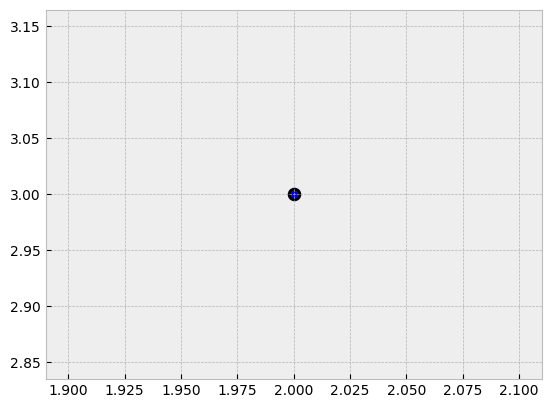

In [ ]:
%matplotlib inline

# Create a point using a Python list
point = [2, 3]

def draw_point(point):
  # Use scatter() to plot the point
  plt.scatter(point[0], point[1], # Grab the point XY coordinates
              s=60,
              color="blue",
              linewidth=2,
              edgecolors="black")
  plt.show()
  return

draw_point(point)

### Introduction to Segments

A **segment** with endpoints A and B is the set AB defined as:

<center>
  $ \bar{AB} = \{A + λ ⋅ \bar{AB} / 0 ≤ λ ≤ 1\} = \{(1- λ)⋅ A + λ ⋅B / 0 ≤ λ ≤ 1\}$
</center>

In this definition, **λ is a parameter that varies from 0 to 1**. When λ is 0, we get the point A, and when λ is 1, we get the point B. For values of λ between 0 and 1, we get points on the line segment between A and B. **This is a common mathematical way to define a line segment**.

**In Python, a segment can be represented as a pair of tuples or lists**, each containing two numbers representing the coordinates of the endpoints. For example, the segment with endpoints (2, 3) and (4, 5) can be represented as [(2, 3), (4, 5)].

To **plot a segment in Python**, we can **use the plot() function from the matplotlib library**. The plot() function takes two arrays as input, one for the x-coordinates and one for the y-coordinates. **For example, to plot the segment with endpoints (2, 3) and (4, 5), we can use the following code:**

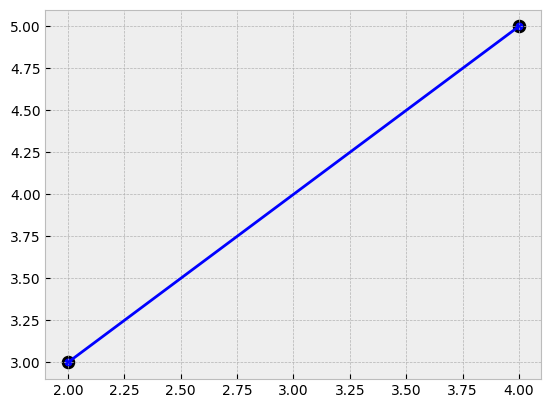

In [ ]:
%matplotlib inline

# Create a segment using a Python list
segment = [(2, 3), (4, 5)]

def draw_segment(segment):
  # Use plot() to plot the segment
  plt.plot([point[0] for point in segment], [point[1] for point in segment],
          color="blue", linewidth=2)

  # Use scatter() to plot the endpoints of the segment
  for endpoint in segment:
    plt.scatter(endpoint[0], endpoint[1], s=60, color="blue",
                linewidth=2, edgecolors="black")

  plt.show()
  return

draw_segment(segment)

### Introduction to Polygonals

A **polygonal** is an ordered set of **n distinct points** in the plane, denoted as $\{v_1, v_2, …, v_n\}$. This set determines a polygonal chain, which is the union of the segments $\bar{v_1v_2}, \bar{v_2v_3}, …, \bar{v_{n-1}v_n}$.

In this definition, each point vi (for i from 1 to n) is a **vertex** of the polygonal, and each segment vivi+1 (for i from 1 to n-1) is an **edge** of the polygonal. The order of the points is important, as it determines the shape of the polygonal.

A **closed polygonal** is a polygonal where the first and last vertices are the same, i.e., **the polygonal forms a closed loop**. In other words, a polygonal is closed if it starts and ends at the same point.

**In Python, a polygonal can be represented as a list of tuples or lists**, each containing two numbers representing the coordinates of the vertices. For example, a triangle with vertices (1, 1), (2, 3), and (3, 1) can be represented as [(1, 1), (2, 3), (3, 1)].

To **plot a polygonal in Python**, we can use the plot() function from the matplotlib library again. **For example, to plot the close polygonal with vertices (1, 1), (4, 2), (3, 3), (5, 5), (2, 4) and (1, 1), we can use the following code**:

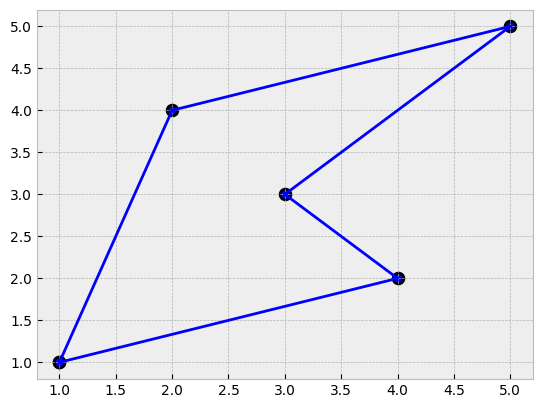

In [ ]:
%matplotlib inline

# Define the vertices of the polygonal
vertices = [(1, 1), (4, 2), (3, 3), (5, 5), (2, 4), (1, 1)]

def draw_polygonal(point):
  # Create arrays for the x and y coordinates
  x = [vertex[0] for vertex in vertices]
  y = [vertex[1] for vertex in vertices]

  # Plot the polygonal
  plt.plot(x, y, color="blue", linewidth=2)

  # Use scatter() to plot the endpoints of the segment
  for vertex in vertices:
    plt.scatter(vertex[0], vertex[1], s=60, color="blue",
                linewidth=2, edgecolors="black")

  plt.show()

  # Display the plot
  plt.show()
  return

draw_polygonal(vertices)

On the other hand, a **simple polygonal** (or simple polygon) is a polygonal that does not intersect itself. This means that **the sides of the polygonal do not cross each other**. All the interior angles are less than 180 degrees.

For example this, is not a simple polygonal:

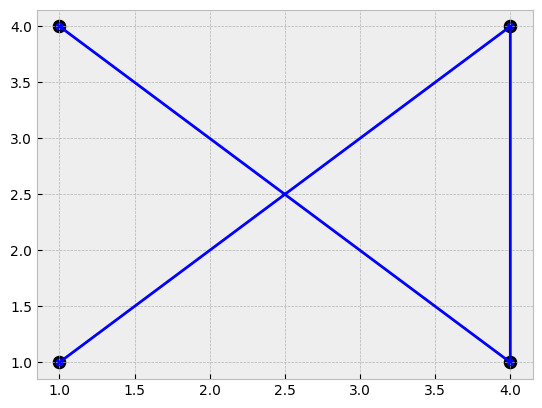

In [ ]:
%matplotlib inline

vertices = [(1, 1), (4, 4), (4, 1), (1, 4)]
draw_polygonal(vertices)

In [ ]:
# @title Note: Closed and simple

%%html
<style>
div.warn {
    color: #356A89;
    background-color: #D4EAF7;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    display: inline-block;
    }
 </style>
<div class=warn>
<strong>Note</strong>: It’s important to note that a polygonal can be <strong>
  both closed and simple</strong>. For instance, the example above is both
  closed and simple.
</div>

### Introduction to polygons

A **polygon** can be represented by **a series of vertices which form a closed polygonal**.

The polygon is divided into **three parts**:

1. **Interior of the polygon (Int(P))**: This is the set of points in the interior region. These are the points that are completely inside the polygon.

2. **Boundary of the polygon (Fr(P) or ∂P)**: This is the set of points of the closed polygonal. These are the points that form the edges of the polygon.

3. **Exterior of the polygon (Ext(P))**: This is the set of points in the exterior region. These are the points that are completely outside the polygon.

**In Python, a polygon can be represented the same way as a polygonal**.

To **draw a polygon in Python**, we can use the plot() function from the matplotlib library, just like with segments. However, to **ensure that the polygon is closed**, we need to re-plot the first point at the end. Here’s an example of how to do it:

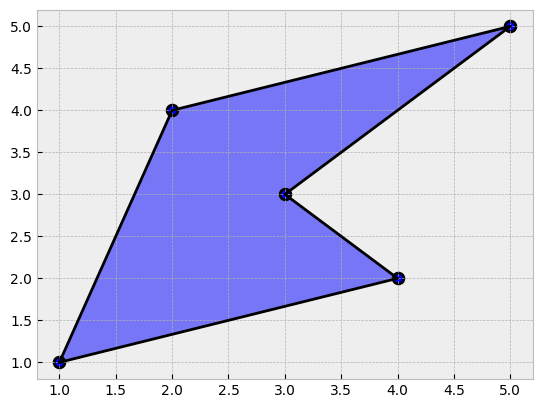

In [ ]:
%matplotlib inline

# Create a polygon using a Python list
polygon = [(1, 1), (4, 2), (3, 3), (5, 5), (2, 4)]

def draw_polygon(polygon):
    # Ensure the polygon is closed by re-plotting the first point
    closed_polygon = polygon + [polygon[0]]

    # Use plot() to draw the polygon
    plt.plot([point[0] for point in closed_polygon], [point[1] for point in closed_polygon],
             color="black", linewidth=2)

    # Use fill() to add a semi-transparent fill to the polygon
    plt.fill([point[0] for point in closed_polygon], [point[1] for point in closed_polygon],
             color="blue", alpha=0.5)  # alpha parameter controls the transparency

    # Use scatter() to draw the vertices of the polygon
    for vertex in polygon:
        plt.scatter(vertex[0], vertex[1], s=60, color="blue",
                    linewidth=2, edgecolors="black")

    plt.show()
    return

draw_polygon(polygon)

## What is a Convex Polygon?

### Intuitive definition
A **convex polygon** is a simple polygon (not self-intersecting) in which **no line segment between two points on the boundary ever goes outside the polygon**. This means that **if you were to ‘walk’ along the edge of the polygon, you would never ‘leave’ the polygon**.

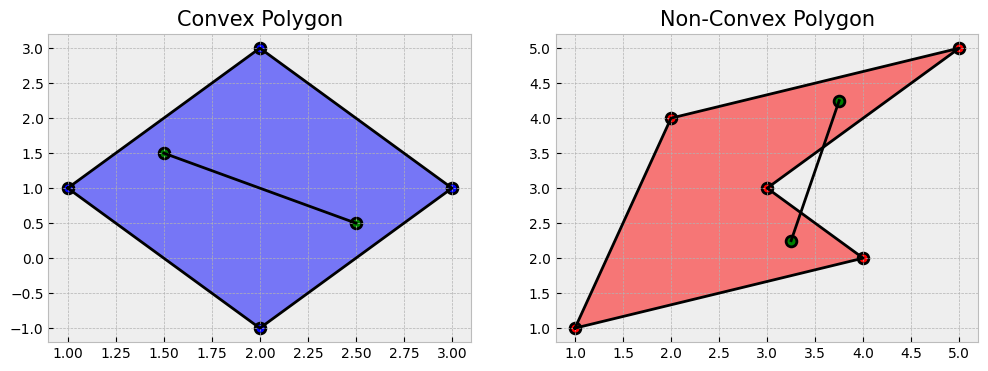

In [ ]:
# @title Convex vs Non-Convex Polygon
%matplotlib inline

# Define the polygons
convex_polygon = [(1, 1), (2, 3), (3, 1), (2, -1)]
non_convex_polygon = [(1, 1), (4, 2), (3, 3), (5, 5), (2, 4)]

# Ensure the polygons are closed by re-plotting the first point
closed_convex_polygon = convex_polygon + [convex_polygon[0]]
closed_non_convex_polygon = non_convex_polygon + [non_convex_polygon[0]]

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Plot the convex polygon
axs[0].plot([point[0] for point in closed_convex_polygon], [point[1] for point in closed_convex_polygon],
            color="black", linewidth=2)
axs[0].fill([point[0] for point in closed_convex_polygon], [point[1] for point in closed_convex_polygon],
            color="blue", alpha=0.5)  # alpha parameter controls the transparency
for vertex in convex_polygon:
    axs[0].scatter(vertex[0], vertex[1], s=60, color="blue",
                   linewidth=2, edgecolors="black")
axs[0].set_title('Convex Polygon', fontsize=15)

# Plot segment inside polygon
segment0 = [(1.5, 1.5), (2.5, 0.5)]
axs[0].plot([point[0] for point in segment0], [point[1] for point in segment0],
            color="black", linewidth=2)

# Use scatter() to plot the endpoints of the segment
for endpoint in segment0:
  axs[0].scatter(endpoint[0], endpoint[1], s=60, color="green",
                 linewidth=2, edgecolors="black")

# Plot the non-convex polygon
axs[1].plot([point[0] for point in closed_non_convex_polygon], [point[1] for point in closed_non_convex_polygon],
            color="black", linewidth=2)
axs[1].fill([point[0] for point in closed_non_convex_polygon], [point[1] for point in closed_non_convex_polygon],
            color="red", alpha=0.5)  # alpha parameter controls the transparency
for vertex in non_convex_polygon:
    axs[1].scatter(vertex[0], vertex[1], s=60, color="red",
                   linewidth=2, edgecolors="black")
axs[1].set_title('Non-Convex Polygon', fontsize=15)

# Plot segment inside/outside polygon
segment1 = [(3.25, 2.25), (3.75, 4.25)]
axs[1].plot([point[0] for point in segment1], [point[1] for point in segment1],
            color="black", linewidth=2)

# Use scatter() to plot the endpoints of the segment
for endpoint in segment1:
  axs[1].scatter(endpoint[0], endpoint[1], s=60, color="green",
                 linewidth=2, edgecolors="black")

# Display the plot
plt.show()

Equivalently, it is a simple polygon whose interior is a convex set. In a convex polygon, **all its interior angles are less than or equal to 180 degrees**.

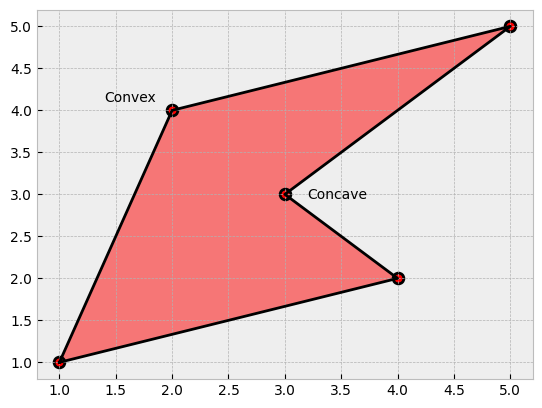

In [ ]:
# @title Convex vs Concave Vertex
%matplotlib inline

# Define the non convex polygon
non_convex_polygon = [(1, 1), (4, 2), (3, 3), (5, 5), (2, 4)]

# Ensure the polygons are closed by re-plotting the first point
closed_non_convex_polygon = non_convex_polygon + [non_convex_polygon[0]]

# Plot the non-convex polygon
plt.plot([point[0] for point in closed_non_convex_polygon], [point[1] for point in closed_non_convex_polygon],
         color="black", linewidth=2)
plt.fill([point[0] for point in closed_non_convex_polygon], [point[1] for point in closed_non_convex_polygon],
         color="red", alpha=0.5)  # alpha parameter controls the transparency
for vertex in non_convex_polygon:
    plt.scatter(vertex[0], vertex[1], s=60, color="red",
                linewidth=2, edgecolors="black")

# Annotate convex vertex
plt.annotate("Convex", (1.4, 4.1))

# Annotate concave vertex
plt.annotate("Concave", (3.2, 2.95))

# Display the plot
plt.show()

### Mathematical approach. Convex Sets.
The **mathematical definition** of a convex polygon is a bit more rigorous. A polygon is convex if for every pair of points within the polygon, the entire line segment connecting these points is contained in the polygon. This can be formally written as:

<center>
  $ P = \{t_1·p_1+t_2·p_2+...+t_n·p_n \mid t_i >= 0, i=1,...,k, \sum_{i=1}^{n}t_i = 1\} $
</center>

where ($P$) is the polygon, ($p_i$) are the vertices of the polygon, and ($t_i$) are real numbers.

This definition **formalizes the previous intuition**. It is equivalent to saying that **any point inside the polygon can be expressed as a weighted average, or convex combination, of the vertices of the polygon**.

In [ ]:
# @title Test this approach
%matplotlib inline

# Define the vertices of the polygon
vertices = [(1, 1), (2, 3), (3, 1), (2, -1)]

# Ensure the polygons are closed by re-plotting the first point
closed_convex_polygon = vertices + [vertices[0]]

# Create an output widget for the plot and the warning message
output = widgets.Output()

def plot_demonstration(t1=0.25, t2=0.25, t3=0.25, t4=0.25):
    # Clear the output widget
    output.clear_output()

    # Define the weights for the convex combination
    weights = np.array([t1, t2, t3, t4])

    # Check if the weights sum to more than 1
    if np.sum(weights) != 1:
        with output:
          display(HTML('''
          <style>
          div.warn {
              color: #8B4513;
              background-color: #FFD700;
              border-left: 5px solid #FF8C00;
              padding: 0.5em;
              }
          </style>
          <div class=warn>
          <strong>Warning:</strong> The weights don't add up to 1!
          </div>
          '''))
        return

    plt.figure(1)

    # Calculate the point as a weighted sum of the vertices
    point = np.dot(weights, vertices)

    # Plot the convex polygon
    plt.plot([point[0] for point in closed_convex_polygon],
             [point[1] for point in closed_convex_polygon],
             color="black", linewidth=2)
    plt.fill([point[0] for point in closed_convex_polygon],
             [point[1] for point in closed_convex_polygon],
             color="blue", alpha=0.5)
    for vertex in vertices:
        plt.scatter(vertex[0], vertex[1], s=60, color="blue",
                    linewidth=2, edgecolors="black")

    # Plot the point
    plt.plot(point[0], point[1], 'ro')

    # Display the plot in the output widget
    with output:
        plt.show()
    return

# Create interactive widgets for the weights
t1 = widgets.FloatText(value=0.25, step=0.05, description='Pick a t1 value:')
t2 = widgets.FloatText(value=0.25, step=0.05, description='Pick a t2 value:')
t3 = widgets.FloatText(value=0.25, step=0.05, description='Pick a t3 value:')
t4 = widgets.FloatText(value=0.25, step=0.05, description='Pick a t4 value:')
button = widgets.Button(description="Plot")

# Display the widgets
ui = widgets.VBox([t1, t2, t3, t4, button],
                  layout=widgets.Layout(display='flex'))
display(HTML('<h3>Choose the weight values</h3>'))
display(ui)
display(HTML('<br></br>'))
display(output)

def on_button_clicked(b):
    plot_demonstration(t1.value, t2.value, t3.value, t4.value)

button.on_click(on_button_clicked)

Output()

## What is a Convex Hull?

### Intuitive definition
<img align="right" width="274" src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*yzXuxl3zab1Q5_4fQ0gUMA.png">

The convex hull of a set of points is the **smallest convex shape or boundary that encloses all the points within the set**. Think of it as **stretching an elastic band around a scatter of points**; the shape formed by the band while encompassing all the points without any inward dents or curves is the convex hull.

This simple idea is **complex to simulate with a computer**. That is why **algorithms were created to find the convex closure** of a cloud of points in a reasonable time.

However, before exploring these algorithms, let's see **when this idea came about**.

### History of the Convex Hull
<img align="right" width="274" src="https://images.lib.cam.ac.uk/content/images/MS-ADD-03977-001-00003.jpg">

The concept of the convex hull has a long history in mathematics and computer science. The **lower convex hull of points** in the plane appears, in the form of a Newton polygon, **in a letter from Isaac Newton to Henry Oldenburg in 1676**.

On the right you can see a brief fragment of this text. The **full manuscript** can be found at the following link: https://cudl.lib.cam.ac.uk/view/MS-ADD-03977/3

The **term "convex hull" itself** appears much later,for instance in **Hans Rademacher's review of Kőnig (1922)**. Other terms, such as "convex envelope", were also used in this time frame.

Today, the convex hull remains **a fundamental concept in computational geometry** with diverse real-world applications across various fields. In computational geometry and computer science, algorithms for computing the convex hull are pivotal for **solving problems related to spatial analysis, pattern recognition, and collision detection in robotics and computer vision**.

In **other fields** such as geographic information systems (GIS), the convex hull assists in delineating territories, optimizing routes, and identifying critical geographic boundaries. Moreover, in machine learning and data analysis, the convex hull aids in outlier detection, clustering, and feature selection, contributing significantly to enhancing data-driven decision-making processes.

### Mathematical Approach. Convex Hull.
A convex hull can be defined as **the intersection of all convex sets containing the points in the set**. The mathematical expression for the convex hull of a set of points is:

<center>
  $H=\bigcap_{i=1}^n​C_i​$
</center>

where ($H$) is the convex hull, ($C_i$​) is the i-th convex set containing the points, and ($\bigcap$) denotes the intersection of all the sets.

### Algorithms to compute Convex Hull

The convex hull of a set of points can be computed using various algorithms, such as the **Jarvis' march (also called Gift Wrapping), the Graham scan or the Quickhull algorithm**.


**Below is a step-by-step animation of each of the algorithms**. Don't worry if you don't understand the code, this should only serve as a motivation to learn the procedure of each algorithm in the next sections.

In [ ]:
# @title Comparison between algorithms
%matplotlib notebook

# Function to know if point P lies on the left side of line AB
def left_index(A, B, P):
    return (B[0] - A[0])*(P[1] - A[1]) - (B[1] - A[1])*(P[0] - A[0])

# QuickHull algorithm with history of all steps
def quickHull(P):
    # Find the leftmost and rightmost points
    l = min(P, key=lambda point: point[0])
    r = max(P, key=lambda point: point[0])
    # Initialize the hull and the history
    L = [l, r]
    history = [list(L)]
    # Split the set of points into two subsets
    S1 = [p for p in P if left_index(l, r, p) > 0]
    S2 = [p for p in P if left_index(l, r, p) < 0]
    # Compute the hull
    hull(S1, l, r, L, history)
    hull(S2, r, l, L, history)
    return np.array(L), history

# Recursive function to compute the hull
def hull(S, A, B, L, history):
    if not S:
        return
    # Find the farthest point
    C = max(S, key=lambda p: left_index(A, B, p))
    # Update the hull and the history
    L.insert(L.index(B), C)
    history.append(list(L))
    # Split the set of points
    S1 = [p for p in S if left_index(A, C, p) > 0]
    S2 = [p for p in S if left_index(C, B, p) > 0]
    # Record the history for each point considered
    for point in S1 + S2:
        history.append(L + [point])
    # Recurse on the two subsets
    hull(S1, A, C, L, history)
    hull(S2, C, B, L, history)

# Jarvis March algorithm with history of all steps
def jarvis(S):
    # Find the leftmost point
    pointOnHull = min(S, key=lambda point: point[0])
    # Initialize the hull and the history
    P = [pointOnHull]
    history = [[pointOnHull]]
    i = 0
    while True:
        endpoint = S[0]
        for j in range(len(S)):
            if (endpoint == pointOnHull) or (left_index(P[i], endpoint, S[j]) < 0):
                endpoint = S[j]
                # Record the history for each point considered
                history.append(P + [endpoint])
        i = i + 1
        pointOnHull = endpoint
        if endpoint == P[0]:
            break
        else:
            P.append(pointOnHull)
            # Record the history for each point added to the hull
            history.append(list(P))
    return np.array(P), history

# Function to know if we have a ccw turn
def CCW(p1, p2, p3):
    return (p2[0] - p1[0])*(p3[1] - p1[1]) >= (p2[1] - p1[1])*(p3[0] - p1[0])

# Graham scan algorithm with history of all steps
def grahamScan(P):
    # Find the lowest y-coordinate and leftmost point, P0
    P0 = min(P, key=lambda point: (point[1], point[0]))
    # Sort points by polar angle with P0, if several points have the same polar
    # angle then only keep the farthest
    P = sorted(P, key=lambda point: (
        math.atan2(point[1]-P0[1], point[0]-P0[0]),
        -(point[0]-P0[0])**2 - (point[1]-P0[1])**2))
    # Initialize the stack and the history
    stack = [P[0], P[1]]
    history = [list(stack)]
    # Process the points
    for point in P[2:]:
        # Pop the last point from the stack if we turn clockwise to reach this
        # point
        while len(stack) > 1 and not CCW(stack[-2], stack[-1], point):
            stack.pop()
            history.append(list(stack))
        # Push the point to the stack
        stack.append(point)
        history.append(list(stack))
    return np.array(stack), history

# Create a slider for the size of the dataset
size_slider = widgets.IntSlider(
    value=10,
    min=10,
    max=100,
    step=5,
    description='Choose Size:',
    continuous_update=False
)

# Create a dropdown for the distribution type
dist_dropdown = widgets.Dropdown(
    options=['normal', 'uniform'],
    value='normal',
    description='Distribution:',
)

# Define the HTML for the spinner
spinner_html = """
<div id="spinner" style="display: none;">
  <div class="loader"></div>
</div>

<style>
.loader {
  border: 4px solid #f3f3f3;
  border-radius: 50%;
  border-top: 4px solid #3498db;
  width: 17px;
  height: 17px;
  margin-left: 20px;
  -webkit-animation: spin 2s linear infinite; /* Safari */
  animation: spin 2s linear infinite;
}

/* Safari */
@-webkit-keyframes spin {
  0% { -webkit-transform: rotate(0deg); }
  100% { -webkit-transform: rotate(360deg); }
}

@keyframes spin {
  0% { transform: rotate(0deg); }
  100% { transform: rotate(360deg); }
}
</style>
"""

# Create a button to start the animation
start_button = widgets.Button(description="Start Animation")

# Create a HTML widget for the spinner
spinner_widget = widgets.HTML(spinner_html)

# Arrange the button and the spinner horizontally
button_and_spinner = widgets.HBox([start_button, spinner_widget])

# Create ui
ui = widgets.VBox([size_slider, dist_dropdown, button_and_spinner],
                  layout=widgets.Layout(display='flex'))

# Create output
output = widgets.Output()


# Display the widgets
display(HTML('<h3>Choose generation parameters</h3>'))
display(ui)
display(HTML('<br></br>'))
display(output)

# Define the button click event
def on_button_clicked(b):
    # Clear the output widget
    output.clear_output()

    # Enable the spinner
    display(HTML("""
    <script>
    document.getElementById('spinner').style.display = 'block';
    </script>
    """))

    N = size_slider.value
    dist_type = dist_dropdown.value

    if dist_type == 'normal':
        P = [(np.random.normal(0.5, 0.1), np.random.normal(0.5, 0.1)
        ) for _ in range(N)]
    else:
        P = [(np.random.uniform(0, 1), np.random.uniform(0, 1)
        ) for _ in range(N)]

    # Compute the convex hull and get the history for each algorithm
    L_quick, history_quick = quickHull(P)
    L_jarvis, history_jarvis = jarvis(P)
    L_graham, history_graham = grahamScan(P)

    # Create the figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))

    # Adjust the spacing between the subplots and remove the margins
    fig.subplots_adjust(hspace=0.5)

    # Animation update function
    def update(num):
        colors = ["blue", "green", "red"]
        for ax, color in zip(axs, colors):
            ax.clear()
            ax.scatter([p[0] for p in P], [p[1] for p in P], s=60, color=color,
                      linewidth=2, edgecolors="black")

            ax.grid(False)  # Hide grid lines
            ax.set_facecolor('white')  # Set background to white
            ax.axis('off')  # Remove the frame

            # Hide axes ticks
            ax.set_xticks([])
            ax.set_yticks([])

        axs[0].set_title("Quickhull", y=-0.25, fontsize=20, pad=20)
        if num < len(history_quick):
            if len(history_quick[num]) > 1:
                axs[0].plot(*zip(*history_quick[num]), 'b-')
        else:
            axs[0].plot(*zip(*L_quick, L_quick[0]), 'b-')  # Close polygonal

        axs[1].set_title("Gift Wrapping", y=-0.25, fontsize=20, pad=20)
        if num < len(history_jarvis):
            if len(history_jarvis[num]) > 1:
                axs[1].plot(*zip(*history_jarvis[num]), 'g-')
        else:
            axs[1].plot(*zip(*L_jarvis, L_jarvis[0]), 'g-')  # Close polygonal

        axs[2].set_title("Graham Scan", y=-0.25, fontsize=20, pad=20)
        if num < len(history_graham):
            if len(history_graham[num]) > 1:
                axs[2].plot(*zip(*history_graham[num]), 'r-')
        else:
            axs[2].plot(*zip(*L_graham, L_graham[0]), 'r-')  # Close polygonal

    # Adjust to a tight layout
    fig.tight_layout(pad=4)

    # Create the animation
    ani = animation.FuncAnimation(fig, update,
      frames=max(len(history_quick), len(history_jarvis),
                len(history_graham))+1, repeat=False)

    # Display the animation in the output widget
    with output:
      # Convert the animation to HTML5 video format
      display(HTML(ani.to_html5_video()))

    # Disable the spinner
    display(HTML("""
    <script>
    document.getElementById('spinner').style.display = 'none';
    </script>
    """))

# Attach the event to the button
start_button.on_click(on_button_clicked)

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title Note: Number of steps on
%%html
<style>
div.warn {
    color: #356A89;
    background-color: #D4EAF7;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    display: inline-block;
    }
 </style>
<div class=warn>
<strong>Note</strong>: The animation length of these algorithms can be
**different from their time complexities**. The history length is related to the
number of steps the algorithm takes, which includes not only the main steps of
the algorithm but also the “undo” steps when the algorithm backtracks or changes
its mind.
</div>

## Graham Scan

<img align="right" width="200" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Ronald_graham_writing.jpg/330px-Ronald_graham_writing.jpg">

This algorithm is the **oldest of the three** that we are going to explore. It was **published by the mathematician Ronald Graham in 1972**. Ronald Graham, apart from his contributions to the Graham Scan algorithm, made **significant strides in mathematics**, notably **co-authoring the Graham-Pollak theorem** in graph theory. Beyond his scholarly pursuits, Graham was also known for his **exceptional skills in juggling**, showcasing his diverse talents beyond mathematics.

The Graham Scan algorithm stands out for its efficiency and robustness, boasting the **lowest time complexity out of the three above mentioned, O(n log n)**. This efficiency makes it highly practical for handling large datasets and computational tasks that require finding the convex hull.

The **original paper** describing the algorithm can be found in the following algorithm: http://www.math.ucsd.edu/~ronspubs/72_10_convex_hull.pdf

In this section we will explore the **main idea and pseudocode*** of the algorithm, and then implement it **in Python**.

### Main Procedure
The main concept behind the Graham Scan involves **sorting the points based on their polar angles with respect to a reference point** (often the point with the lowest y-coordinate and leftmost point). By systematically **considering the orientation of points and their angles relative to a pivot point**, the algorithm efficiently constructs the convex hull by eliminating unnecessary interior points.

This is a lot of information at once. **Let's see the logic of the algorithm step by step**.

First we are going to generate a point cloud with a random seed and we will **find the lowest y-coordinate and leftmost point**. This will be our **reference point**.

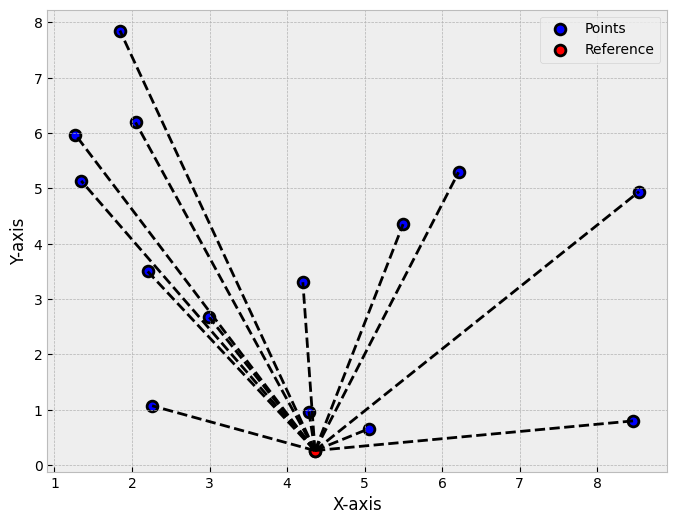

In [ ]:
# @title Generating data points. Finding the reference point.
%matplotlib inline

# Set a seed for reproducibility
np.random.seed(2)

# Generate 15 random points within a range (0, 10) for both x and y coordinates
P = [(np.random.uniform(low=0, high=10), np.random.uniform(low=0, high=10)
) for _ in range(15)]

# Find the lowest y-coordinate and leftmost point, P0
P0 = min(P, key=lambda point: (point[1], point[0]))

# Extract x and y coordinates for plotting
x_values = [point[0] for point in P]
y_values = [point[1] for point in P]

# Plot all points
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=60, color='blue', linewidth=2,
            edgecolors="black", label='Points')

# Plot reference point (P0)
plt.scatter(P0[0], P0[1], s=60, color='red', linewidth=2, edgecolors="black",
            label='Reference')

# Plot edges between P0 and other points
for point in P:
    if not np.array_equal(point, P0):
        plt.plot([P0[0], point[0]], [P0[1], point[1]], 'k--')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

The next step is to **sort the points** based on their polar angles with respect to a reference point and **start building** our hull. We start by putting the first two points in our sorted list on the hull. The **next section will address the algorithm** to find the rest of the points of the convex hull.

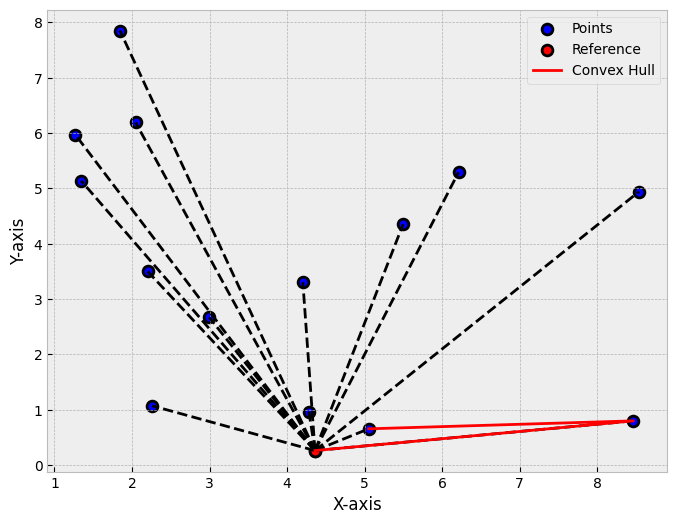

In [ ]:
# @title Sorting points. Start building the hull.
%matplotlib inline

# Set a seed for reproducibility
np.random.seed(2)

# Generate 15 random points within a range (0, 10) for both x and y coordinates
P = [(np.random.uniform(low=0, high=10), np.random.uniform(low=0, high=10)
) for _ in range(15)]

# Find the lowest y-coordinate and leftmost point, P0
P0 = min(P, key=lambda point: (point[1], point[0]))
x_values = [point[0] for point in P]
y_values = [point[1] for point in P]

# Sort points by polar angle with P0, if several points have the same polar angle,
# then only keep the farthest
P = sorted(P, key=lambda point: (math.atan2(point[1]-P0[1], point[0]-P0[0]),
                                  -(point[0]-P0[0])**2 - (point[1]-P0[1])**2))

# Initialize the hull
hull = [P[0], P[1], P[2]]
hull_x = [point[0] for point in hull]
hull_y = [point[1] for point in hull]

# Plot all points
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=60, color='blue', linewidth=2,
            edgecolors="black", label='Points')

# Plot reference point (P0)
plt.scatter(P0[0], P0[1], s=60, color='red', linewidth=2, edgecolors="black",
            label='Reference')

# Plot edges between P0 and other points
for point in P:
    if not np.array_equal(point, P0):
        plt.plot([P0[0], point[0]], [P0[1], point[1]], 'k--')

# Plot the convex hull
plt.plot(hull_x, hull_y, color='red', linestyle='-', linewidth=2,
         label='Convex Hull')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

#### Algorithm Explained through a Right Arm Hug

**Imagine standing in the center of a room surrounded by your friends**. You extend your **right arm** to initiate a hug, intending to **include all your friends within the hug**.

In terms of the Graham Scan Algorithm analogy, **consider yourself as the reference point** for constructing the convex hull. **Your extended arm represents the initial line forming part of the hull**. **Each friend around you signifies a point** that needs to be included in the convex hull.

**As you start embracing them, you notice that one friend is not encompassed by your hug. In response, you retract your arm slightly and then extend it again, readjusting its position to ensure that the friend left out is now included in the hug**.

In essence, **this process parallels the iterative steps of the Graham Scan Algorithm**. It involves **constantly readjusting the boundary** (the arm's position in the hug) to ensure that all points are enveloped within the convex hull (embraced by the extended arm).
<br></br>

**After establishing the initial line** formed by the first two points within the convex hull, **the algorithm progresses to consider the subsequent points in the sorted list**.

**At each step, it evaluates the relative orientation between the current, last and before last points in the sequence**. The objective remains consistent: ensuring that our metaphorical right arm envelops all friends in a counterclockwise manner.

When determining the orientation, **if at any point in the sequence, the convex hull—symbolized by our extended arm—seems to turn in a clockwise direction, it implies that a point (representing a friend) might have been excluded from the embrace**. This detection of a clockwise turn within the convex hull signifies the possibility of an omitted point, **disrupting the convexity of the hull into a concave shape**.

**To rectify this, the algorithm retraces its steps, going back as necessary in the sequence, in order to restore the convex nature of the closure**. This is shown in the animation below.

In [ ]:
# @title Building the hull. Retracing its steps.
%matplotlib notebook

# Set a seed for reproducibility
np.random.seed(2)

# Generate 15 random points within a range (0, 10) for both x and y coordinates
P = [(np.random.uniform(low=0, high=10), np.random.uniform(low=0, high=10)
) for _ in range(15)]

# Find the lowest y-coordinate and leftmost point, P0
P0 = min(P, key=lambda point: (point[1], point[0]))
x_values = [point[0] for point in P]
y_values = [point[1] for point in P]

# Sort points by polar angle with P0, if several points have the same polar angle,
# then only keep the farthest
P = sorted(P, key=lambda point: (math.atan2(point[1]-P0[1], point[0]-P0[0]),
                                  -(point[0]-P0[0])**2 - (point[1]-P0[1])**2))

# Initialize the stack and the history
hull = [P[0], P[1]]
history = [list(hull)]

# Algorithm
for point in P[2:4]:
    # Pop the last point from the stack if we turn clockwise to reach this
    # point
    while len(hull) > 1 and not CCW(hull[-2], hull[-1], point):
        history.append(list(hull) + [point])
        hull.pop()
    # Push the point to the stack
    hull.append(point)
    history.append(list(hull))

# Create the figure with 3 subplots
fig, ax = plt.subplots()

# Animation update function
def update(num):
  if num < len(history):
      ax.clear()
      ax.scatter([p[0] for p in P], [p[1] for p in P], s=60, color="blue",
                  linewidth=2, edgecolors="black")
      if len(history[num]) > 1:
          ax.plot(*zip(*history[num]), 'r-')
  else:
      # For the last frame, don't clear the plot
      if len(history[-1]) > 1:
          ax.plot(*zip(*history[-1]), 'r-')

# Adjust to a tight layout
fig.tight_layout(pad=4)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(history)+1,
                              interval=1000, repeat=False)

# Convert the animation to HTML5 video format
display(HTML(ani.to_html5_video()))


<IPython.core.display.Javascript object>

By revisiting these steps, **the algorithm ensures that the embrace formed by our right arm does not deviate into concave vertices**, guaranteeing that all friends remain encompassed within the counterclockwise arc of the convex hull.

### Pseudocode

To implement the algorithm we will use the following pseudocode:

    let points be the list of points
    let stack = empty_stack()

    find the lowest y-coordinate and leftmost point, called P0
    sort points by polar angle with P0, if several points have the same polar angle then only keep the farthest

    for point in points:
        # pop the last point from the stack if we turn clockwise to reach this point
        while count stack > 1 and ccw(next_to_top(stack), top(stack), point) <= 0:
            pop stack
        push point to stack
    end

### Exercise: Python Implementation

I encourage you to implement the algorithm yourself, and then see if it matches the proposed solution. Below is provided the function `ccw` which given the current, last and before last points; returns `True` if the orientation is counterclockwise.

In [ ]:
# Function to know if we have a ccw turn
def CCW(p1, p2, p3):
    return (p2[0] - p1[0])*(p3[1] - p1[1]) >= (p2[1] - p1[1])*(p3[0] - p1[0])

# Graham scan algorithm with history of all steps
def grahamScan(P):
    # Write your code here
    stack = ...
    return stack

In [ ]:
%matplotlib inline

# Set a seed for reproducibility
np.random.seed(2)

# Generate 15 random points within a range (0, 10) for both x and y coordinates
P = [(np.random.uniform(low=0, high=10), np.random.uniform(low=0, high=10)
) for _ in range(15)]

# Find the lowest y-coordinate and leftmost point, P0
P0 = min(P, key=lambda point: (point[1], point[0]))
x_values = [point[0] for point in P]
y_values = [point[1] for point in P]

# Use `grahamScan` to find the hull
hull = grahamScan(P)
closed_hull = hull + [hull[0]]
hull_x = [point[0] for point in closed_hull]
hull_y = [point[1] for point in closed_hull]

# Plot all points
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=60, color='blue', linewidth=2,
            edgecolors="black", label='Points')

# Plot reference point (P0)
plt.scatter(P0[0], P0[1], s=60, color='red', linewidth=2, edgecolors="black",
            label='Reference')

# Plot edges between P0 and other points
for point in P:
    if not np.array_equal(point, P0):
        plt.plot([P0[0], point[0]], [P0[1], point[1]], 'k--')

# Plot the convex hull
plt.plot(hull_x, hull_y, color='red', linestyle='-', linewidth=2,
         label='Convex Hull')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

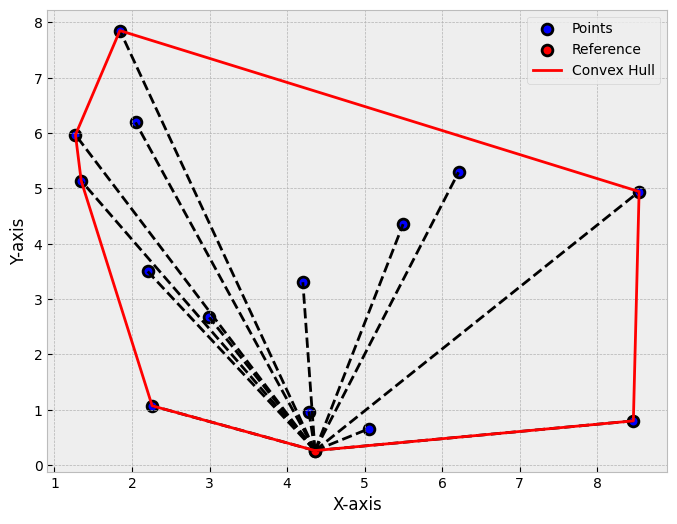

In [ ]:
# @title Solution
%matplotlib inline

# Function to know if we have a ccw turn
def CCW(p1, p2, p3):
    return (p2[0] - p1[0])*(p3[1] - p1[1]) >= (p2[1] - p1[1])*(p3[0] - p1[0])

# Graham scan algorithm with history of all steps
def grahamScan(P):
    # Find the lowest y-coordinate and leftmost point, P0
    P0 = min(P, key=lambda point: (point[1], point[0]))
    # Sort points by polar angle with P0, if several points have the same polar
    # angle then only keep the farthest
    P = sorted(P, key=lambda point: (
        math.atan2(point[1]-P0[1], point[0]-P0[0]),
        -(point[0]-P0[0])**2 - (point[1]-P0[1])**2))
    # Initialize the stack
    stack = [P[0], P[1]]
    # Process the points
    for point in P[2:]:
        # Pop the last point from the stack if we turn clockwise to reach this
        # point
        while len(stack) > 1 and not CCW(stack[-2], stack[-1], point):
            stack.pop()
        # Push the point to the stack
        stack.append(point)
    return stack

# Set a seed for reproducibility
np.random.seed(2)

# Generate 15 random points within a range (0, 10) for both x and y coordinates
P = [(np.random.uniform(low=0, high=10), np.random.uniform(low=0, high=10)
) for _ in range(15)]

# Find the lowest y-coordinate and leftmost point, P0
P0 = min(P, key=lambda point: (point[1], point[0]))
x_values = [point[0] for point in P]
y_values = [point[1] for point in P]

# Use `grahamScan` to find the hull
hull = grahamScan(P)
closed_hull = hull + [hull[0]]
hull_x = [point[0] for point in closed_hull]
hull_y = [point[1] for point in closed_hull]

# Plot all points
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=60, color='blue', linewidth=2,
            edgecolors="black", label='Points')

# Plot reference point (P0)
plt.scatter(P0[0], P0[1], s=60, color='red', linewidth=2, edgecolors="black",
            label='Reference')

# Plot edges between P0 and other points
for point in P:
    if not np.array_equal(point, P0):
        plt.plot([P0[0], point[0]], [P0[1], point[1]], 'k--')

# Plot the convex hull
plt.plot(hull_x, hull_y, color='red', linestyle='-', linewidth=2,
         label='Convex Hull')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

## Gift Wrapping

The Gift Wrapping algorithm, was introduced by J. A. Jarvis just a year after the Graham Scan algorithm was published.

The Jarvis March is known for its **simplicity and ease of implementation**. It operates by metaphorically ‘wrapping’ the set of points with a piece of string, hence the name ‘Gift Wrapping’. **Despite its higher time complexity of O(nh)**, where n is the number of points and h is the number of convex hull vertices, it is **particularly efficient when dealing with a small number of hull vertices**.

In the following section, we will delve into the **core concept and pseudocode of the Jarvis March**, and subsequently implement it in Python. Just like unwrapping a gift, you’ll find that understanding this algorithm is a rewarding process. Let’s get started!

### Main procedure

First we are going to generate a point cloud with a random seed and we will **find the lowest y-coordinate and leftmost point**. This will be our **reference point**.

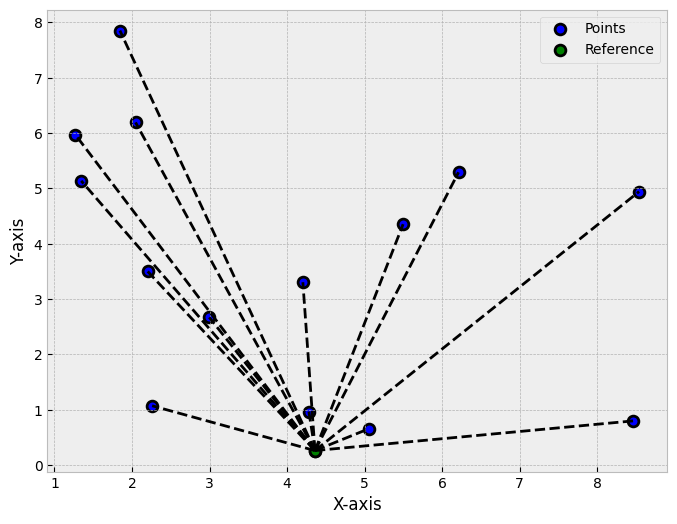

In [ ]:
# @title Generating data points. Finding the reference point.
%matplotlib inline

# Set a seed for reproducibility
np.random.seed(2)

# Generate 15 random points within a range (0, 10) for both x and y coordinates
S = [(np.random.uniform(low=0, high=10), np.random.uniform(low=0, high=10)
) for _ in range(15)]

# Find the lowest y-coordinate and leftmost point, P0
P0 = min(P, key=lambda point: (point[1], point[0]))

# Extract x and y coordinates for plotting
x_values = [point[0] for point in S]
y_values = [point[1] for point in S]

# Plot all points
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=60, color='blue', linewidth=2,
            edgecolors="black", label='Points')

# Plot reference point (P0)
plt.scatter(P0[0], P0[1], s=60, color='green', linewidth=2, edgecolors="black",
            label='Reference')

# Plot edges between P0 and other points
for point in S:
    if not np.array_equal(point, P0):
        plt.plot([P0[0], point[0]], [P0[1], point[1]], 'k--')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

### Pseudocode

To implement the algorithm we will use the following pseudocode:

    let S be the set of points
    let P = empty_list() // P will be the list of points which form the convex hull

    pointOnHull = leftmost point in S // which is guaranteed to be part of the CH(S)
    i := 0

    do
        P[i] := pointOnHull
        endpoint := S[0] // initial endpoint for a candidate edge on the hull

        for j from 0 to |S| do
            // endpoint == pointOnHull is a rare case and can happen only when j == 1 and a better endpoint has not yet been set for the loop
            if (endpoint == pointOnHull) or (S[j] is on left of line from P[i] to endpoint) then
                endpoint := S[j] // found greater left turn, update endpoint

        i := i + 1
        pointOnHull = endpoint
    while endpoint != P[0] // wrapped around to first hull point

### Exercise: Python Implementation

I encourage you to implement the algorithm yourself, and then see if it matches the proposed solution. Below is provided the function `left_index` which **takes three points as input: A, B, and P**. It returns a value that represents **the direction of the turn formed by the three points** when traversed from A to B to P.

**If the result is positive, then P lies to the left of the line AB**, meaning that ABP makes a counter-clockwise turn. **If the result is negative, then P lies to the right of the line AB**, and ABP makes a clockwise turn. If the result is 0, then A, `

In [ ]:
# Function to know if point P lies on the left side of line AB
def left_index(A, B, P):
    return (B[0] - A[0])*(P[1] - A[1]) - (B[1] - A[1])*(P[0] - A[0])

# Jarvis March algorithm with history of all steps
def jarvis(S):
    # Find the leftmost point
    pointOnHull = min(S, key=lambda point: point[0])
    # Write your code here
    P = ...
    return P

In [ ]:
# Set a seed for reproducibility
np.random.seed(2)

# Generate 15 random points within a range (0, 10) for both x and y coordinates
S = [(np.random.uniform(low=0, high=10), np.random.uniform(low=0, high=10)
) for _ in range(15)]

# Find the lowest y-coordinate and leftmost point, P0
P0 = min(P, key=lambda point: (point[1], point[0]))
x_values = [point[0] for point in S]
y_values = [point[1] for point in S]

# Use `jarvis` to find the hull
hull = jarvis(S)
closed_hull = hull + [hull[0]]
hull_x = [point[0] for point in closed_hull]
hull_y = [point[1] for point in closed_hull]

# Plot all points
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=60, color='blue', linewidth=2,
            edgecolors="black", label='Points')

# Plot reference point (P0)
plt.scatter(P0[0], P0[1], s=60, color='green', linewidth=2, edgecolors="black",
            label='Reference')

# Plot edges between P0 and other points
for point in S:
    if not np.array_equal(point, P0):
        plt.plot([P0[0], point[0]], [P0[1], point[1]], 'k--')

# Plot the convex hull
plt.plot(hull_x, hull_y, color='green', linestyle='-', linewidth=2,
         label='Convex Hull')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

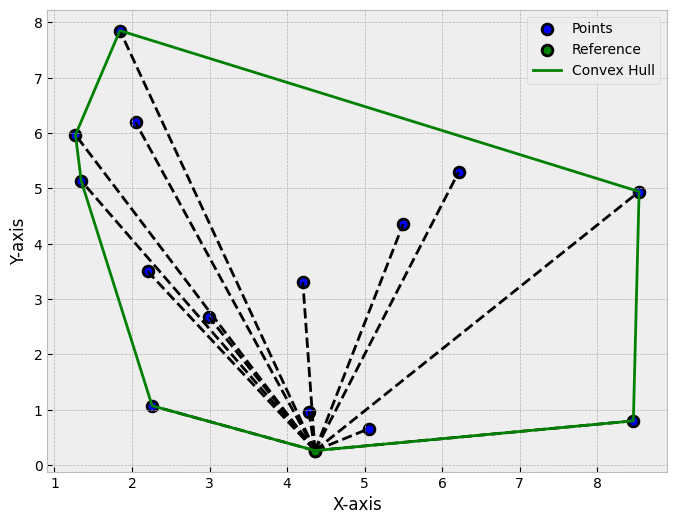

In [ ]:
import urllib.request
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read points from text file
def readPoints(path) :
    # Create an array of points.
    points = [];

    # Read points
    with open(path) as file :
        for line in file :
            x, y = line.split()
            points.append((int(x), int(y)))


    return points

# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size) :

    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform( np.float32(srcTri), np.float32(dstTri) )

    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine( src, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

    return dst


# Check if a point is inside a rectangle
def rectContains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[0] + rect[2] :
        return False
    elif point[1] > rect[1] + rect[3] :
        return False
    return True


#calculate delanauy triangle
def calculateDelaunayTriangles(rect, points):
    #create subdiv
    subdiv = cv2.Subdiv2D(rect);

    # Insert points into subdiv
    for p in points:
        subdiv.insert(p)

    triangleList = subdiv.getTriangleList();

    delaunayTri = []

    pt = []

    for t in triangleList:
        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))

        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        if rectContains(rect, pt1) and rectContains(rect, pt2) and rectContains(rect, pt3):
            ind = []
            #Get face-points (from 68 face detector) by coordinates
            for j in xrange(0, 3):
                for k in xrange(0, len(points)):
                    if(abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0):
                        ind.append(k)
            # Three points form a triangle. Triangle array corresponds to the file tri.txt in FaceMorph
            if len(ind) == 3:
                delaunayTri.append((ind[0], ind[1], ind[2]))

        pt = []


    return delaunayTri


# Warps and alpha blends triangular regions from img1 and img2 to img
def warpTriangle(img1, img2, t1, t2) :

    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    # Offset points by left top corner of the respective rectangles
    t1Rect = []
    t2Rect = []
    t2RectInt = []

    for i in xrange(0, 3):
        t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))
        t2RectInt.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))


    # Get mask by filling triangle
    mask = np.zeros((r2[3], r2[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(t2RectInt), (1.0, 1.0, 1.0), 16, 0);

    # Apply warpImage to small rectangular patches
    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    #img2Rect = np.zeros((r2[3], r2[2]), dtype = img1Rect.dtype)

    size = (r2[2], r2[3])

    img2Rect = applyAffineTransform(img1Rect, t1Rect, t2Rect, size)

    img2Rect = img2Rect * mask

    # Copy triangular region of the rectangular patch to the output image
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ( (1.0, 1.0, 1.0) - mask )

    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] + img2Rect

# Your existing functions: readPoints, applyAffineTransform, rectContains, calculateDelaunayTriangles, warpTriangle, left_index, jarvis go here

if __name__ == '__main__' :
    # Load images
    req1 = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Deadpool_2_Japan_Premiere_Red_Carpet_Ryan_Reynolds_%28cropped%29.jpg/330px-Deadpool_2_Japan_Premiere_Red_Carpet_Ryan_Reynolds_%28cropped%29.jpg')
    arr1 = np.asarray(bytearray(req1.read()), dtype=np.uint8)
    img1 = cv2.imdecode(arr1, -1)

    req2 = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Ryan_Gosling_in_2018.jpg/330px-Ryan_Gosling_in_2018.jpg')
    arr2 = np.asarray(bytearray(req2.read()), dtype=np.uint8)
    img2 = cv2.imdecode(arr2, -1) # 'Load it as it is'

    img1Warped = np.copy(img2);

    # Read array of corresponding points
    points1 = readPoints(filename1 + '.txt')
    points2 = readPoints(filename2 + '.txt')

    # Find convex hull
    hull1 = jarvis(points1)
    hull2 = jarvis(points2)

    # Find delanauy traingulation for convex hull points
    sizeImg2 = img2.shape
    rect = (0, 0, sizeImg2[1], sizeImg2[0])

    dt = calculateDelaunayTriangles(rect, hull2)

    if len(dt) == 0:
        quit()

    # Apply affine transformation to Delaunay triangles
    for i in xrange(0, len(dt)):
        t1 = []
        t2 = []

        #get points for img1, img2 corresponding to the triangles
        for j in xrange(0, 3):
            t1.append(hull1[dt[i][j]])
            t2.append(hull2[dt[i][j]])

        warpTriangle(img1, img1Warped, t1, t2)

    # Calculate Mask
    hull8U = []
    for i in xrange(0, len(hull2)):
        hull8U.append((hull2[i][0], hull2[i][1]))

    mask = np.zeros(img2.shape, dtype = img2.dtype)

    cv2.fillConvexPoly(mask, np.int32(hull8U), (255, 255, 255))

    r = cv2.boundingRect(np.float32([hull2]))

    center = ((r[0]+int(r[2]/2), r[1]+int(r[3]/2)))

    # Clone seamlessly.
    output = cv2.seamlessClone(np.uint8(img1Warped), img2, mask, center, cv2.NORMAL_CLONE)

    cv2.imshow("Face Swapped", output)
    cv2.waitKey(0)

    cv2.destroyAllWindows()


## Quickhull

## Applications of Convex Closures in Computer Vision

In [36]:
import cv2
import numpy as np
import dlib
import urllib.request

!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

--2023-11-17 16:12:46--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   253KB/s    in 14s     

2023-11-17 16:12:59 (4.48 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



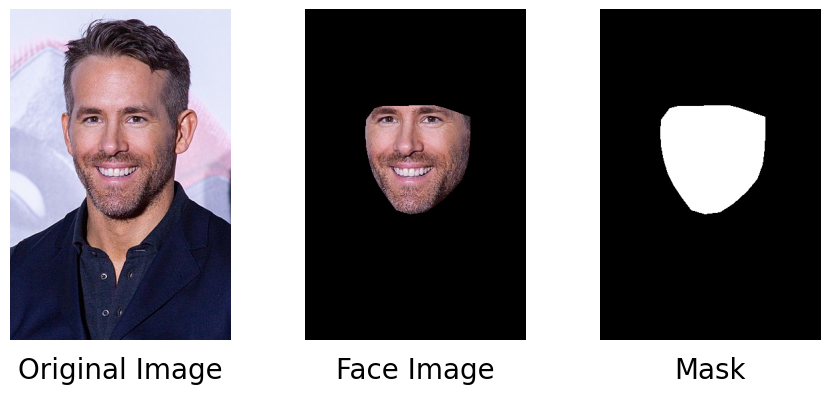

In [38]:
# Function to read image from a url
def url_to_image(url):
    with urllib.request.urlopen(url) as url:
        s = url.read()
    arr = np.asarray(bytearray(s), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    return img

img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Deadpool_2_Japan_Premiere_Red_Carpet_Ryan_Reynolds_%28cropped%29.jpg/330px-Deadpool_2_Japan_Premiere_Red_Carpet_Ryan_Reynolds_%28cropped%29.jpg"
img = url_to_image(img_url)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
        points = np.array(landmarks_points, np.int32)
        convexhull = cv2.convexHull(points)
        cv2.fillConvexPoly(mask, convexhull, 255)
        face_image_1 = cv2.bitwise_and(img, img, mask=mask)

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 4))

# Display original image
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image', y=-0.2, fontsize=20, pad=20)
axs[0].axis('off')

# Display face image
axs[1].imshow(cv2.cvtColor(face_image_1, cv2.COLOR_BGR2RGB))
axs[1].set_title('Face Image', y=-0.2, fontsize=20, pad=20)
axs[1].axis('off')

# Display mask
axs[2].imshow(mask, cmap='gray')
axs[2].set_title('Mask', y=-0.2, fontsize=20, pad=20)
axs[2].axis('off')

plt.tight_layout()
plt.show()
